Epoch 0/200 | Discriminator Loss: 0.4950965642929077 |Generator Loss: 0.7701969146728516
Epoch 1/200 | Discriminator Loss: 0.5120134800672531 |Generator Loss: 0.7429933547973633
Epoch 2/200 | Discriminator Loss: 0.52885901927948 |Generator Loss: 0.7924314141273499
Epoch 3/200 | Discriminator Loss: 0.500582218170166 |Generator Loss: 0.8054274916648865
Epoch 4/200 | Discriminator Loss: 0.5044585168361664 |Generator Loss: 0.7736769318580627
Epoch 5/200 | Discriminator Loss: 0.5413638055324554 |Generator Loss: 0.7992833852767944
Epoch 6/200 | Discriminator Loss: 0.4869125485420227 |Generator Loss: 0.7902206778526306
Epoch 7/200 | Discriminator Loss: 0.5119200646877289 |Generator Loss: 0.7536365389823914
Epoch 8/200 | Discriminator Loss: 0.5141423940658569 |Generator Loss: 0.7798007726669312
Epoch 9/200 | Discriminator Loss: 0.5106725096702576 |Generator Loss: 0.7802008390426636
Epoch 10/200 | Discriminator Loss: 0.4873858541250229 |Generator Loss: 0.7953252792358398
Epoch 11/200 | Discrimi

Epoch 92/200 | Discriminator Loss: 0.5851165503263474 |Generator Loss: 0.6367204189300537
Epoch 93/200 | Discriminator Loss: 0.5784858763217926 |Generator Loss: 0.6153310537338257
Epoch 94/200 | Discriminator Loss: 0.5604735910892487 |Generator Loss: 0.6494399309158325
Epoch 95/200 | Discriminator Loss: 0.584330141544342 |Generator Loss: 0.6519076228141785
Epoch 96/200 | Discriminator Loss: 0.5841648727655411 |Generator Loss: 0.6133251190185547
Epoch 97/200 | Discriminator Loss: 0.5812115669250488 |Generator Loss: 0.6249390840530396
Epoch 98/200 | Discriminator Loss: 0.5825636982917786 |Generator Loss: 0.6304316520690918
Epoch 99/200 | Discriminator Loss: 0.5726388841867447 |Generator Loss: 0.6271355152130127
Epoch 100/200 | Discriminator Loss: 0.5815361738204956 |Generator Loss: 0.6014409065246582
Epoch 101/200 | Discriminator Loss: 0.5986678600311279 |Generator Loss: 0.621641218662262
Epoch 102/200 | Discriminator Loss: 0.5790611952543259 |Generator Loss: 0.6243249773979187
Epoch 103

Epoch 183/200 | Discriminator Loss: 0.6155894696712494 |Generator Loss: 0.5455614328384399
Epoch 184/200 | Discriminator Loss: 0.6141374111175537 |Generator Loss: 0.5724348425865173
Epoch 185/200 | Discriminator Loss: 0.6514213383197784 |Generator Loss: 0.5747909545898438
Epoch 186/200 | Discriminator Loss: 0.6270016133785248 |Generator Loss: 0.557320773601532
Epoch 187/200 | Discriminator Loss: 0.6230612993240356 |Generator Loss: 0.5514873266220093
Epoch 188/200 | Discriminator Loss: 0.6518580168485641 |Generator Loss: 0.5412686467170715
Epoch 189/200 | Discriminator Loss: 0.6335150003433228 |Generator Loss: 0.5446962714195251
Epoch 190/200 | Discriminator Loss: 0.6522619128227234 |Generator Loss: 0.5181139707565308
Epoch 191/200 | Discriminator Loss: 0.6420241594314575 |Generator Loss: 0.5262421369552612
Epoch 192/200 | Discriminator Loss: 0.620031476020813 |Generator Loss: 0.5319207906723022
Epoch 193/200 | Discriminator Loss: 0.6513407975435257 |Generator Loss: 0.5419169068336487
E

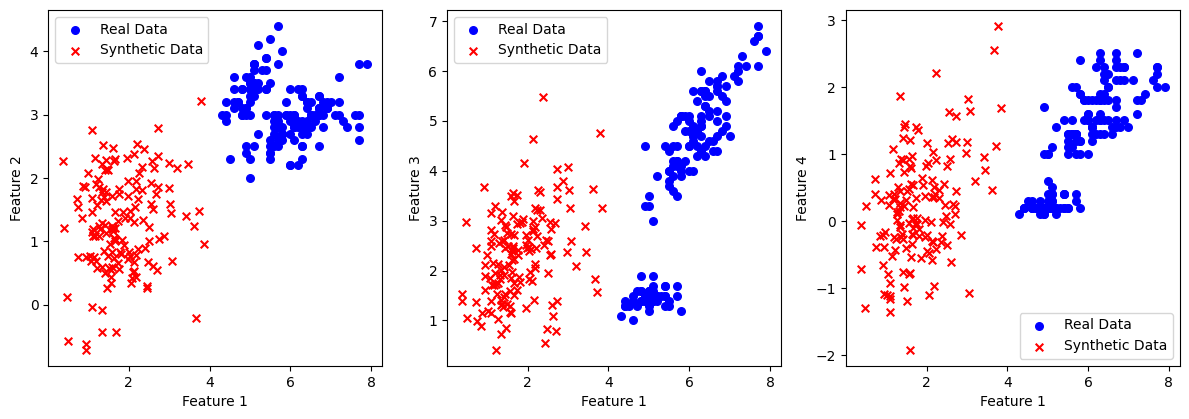

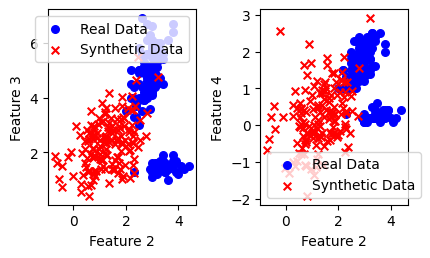

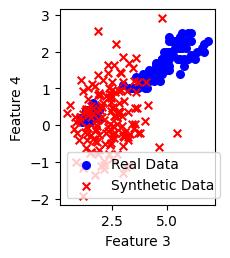

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load and Preprocess the Iris Dataset
iris = load_iris()
x_train = iris.data

# Build the GAN model
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear')) # Output 4 features
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile the Models
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),
metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training Loop
epochs = 200
batch_size = 16

for epoch in range(epochs):
# Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

# Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

# Print progress
    print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])} |Generator Loss: {g_loss}")

# Generating Synthetic Data
synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)

# Create scatter plots for feature pairs
plt.figure(figsize=(12, 8))
plot_idx = 1

for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', marker='x',s=30)
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel(f'Feature {j + 1}')
        plt.legend()
        plot_idx += 1

    plt.tight_layout()
    plt.show()